 <h2 style="color:purple">HR Analytics on data set from Kaggle using Logistic Regression</h2>

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
df=pd.read_csv('C:/Users/hp/OneDrive/Documents/GitHub/py/ML/7_logistic_reg/Exercise/HR_comma_sep.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


## Data Exploratory Analysis

In [8]:
left=df[df.left==1]
left.shape

(3571, 10)

In [9]:
retained=df[df.left==0]
retained.shape

(11428, 10)

In [10]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<h4 style="color:purple"> Satisfaction level vs Employee Retention Grap</h4>

Text(0, 0.5, 'left')

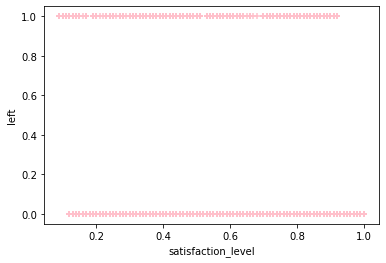

In [66]:
plt.scatter(df['satisfaction_level'],df['left'],color='pink',marker='+')
plt.xlabel('satisfaction_level')
plt.ylabel('left')

 <h4 style="color:purple">Average Montly Hours vs Employee Retention Graph</h4>

Text(0, 0.5, 'left')

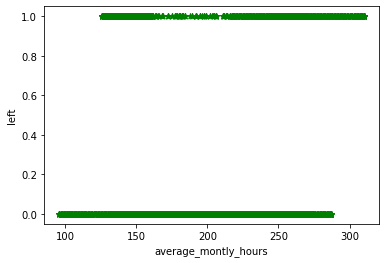

In [65]:
plt.scatter(df['average_montly_hours'],df['left'],color='green',marker='*')
plt.xlabel('average_montly_hours')
plt.ylabel('left')

<h4 style="color:purple">Promotion in Last 5 years vs Employee Retention Graph</h4>

Text(0, 0.5, 'left')

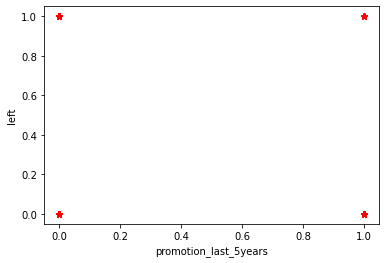

In [60]:
plt.scatter(df['promotion_last_5years'],df['left'],color='red',marker='*')
plt.xlabel('promotion_last_5years')
plt.ylabel('left')

###### Conlcusions: 
-> Satisfaction_level drastically affect employee retention, if Satisfaction_level is 0.66 then employees tend to not leave, if it is arounf 0.44, they tend to leave.

-> average_montly_hours	also affect employee retention, if average_montly_hours is around 199 then employees tend to not leave, if it is around 207 they leave the firm.

-> promotion_last_5years also affect empployee retention, if they are likely to be given promotion then they stay.

##  Impact of employee salaries on retention

<AxesSubplot:xlabel='salary'>

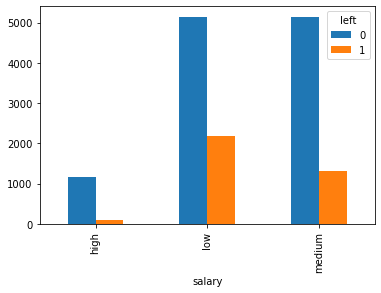

In [11]:
pd.crosstab(df['salary'],df['left']).plot(kind='bar')

## Corelation between department and employee retention

<AxesSubplot:xlabel='Department'>

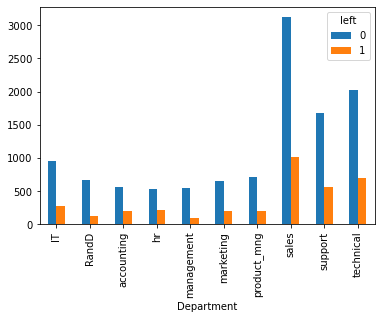

In [12]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

## Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
from sklearn.model_selection import train_test_split

In [72]:
X=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,1
1,0.80,262,0,2
2,0.11,272,0,2
3,0.72,223,0,1
4,0.37,159,0,1
...,...,...,...,...
14994,0.40,151,0,1
14995,0.37,160,0,1
14996,0.37,143,0,1
14997,0.11,280,0,1


In [73]:
y=df['left']
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

### Dealing with text coloumn

In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [86]:
dfle=df
dfle['salary']=le.fit_transform(dfle['salary'])
dfle

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,1
1,0.80,0.86,5,262,6,0,1,0,sales,2
2,0.11,0.88,7,272,4,0,1,0,sales,2
3,0.72,0.87,5,223,5,0,1,0,sales,1
4,0.37,0.52,2,159,3,0,1,0,sales,1
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,1
14995,0.37,0.48,2,160,3,0,1,0,support,1
14996,0.37,0.53,2,143,3,0,1,0,support,1
14997,0.11,0.96,6,280,4,0,1,0,support,1


In [87]:
X=dfle[['salary','satisfaction_level','average_montly_hours','promotion_last_5years']].values
X

array([[1.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [2.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [2.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [1.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [1.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [1.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

In [88]:
y=dfle['left'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('left', OneHotEncoder(), [0])], remainder = 'passthrough')

In [90]:
ct.fit_transform

<bound method ColumnTransformer.fit_transform of ColumnTransformer(remainder='passthrough',
                  transformers=[('left', OneHotEncoder(), [0])])>

In [91]:
X=ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [0.00e+00, 0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

In [92]:
X=X[:,1:]
X

array([[1.00e+00, 0.00e+00, 3.80e-01, 1.57e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 8.00e-01, 2.62e+02, 0.00e+00],
       [0.00e+00, 1.00e+00, 1.10e-01, 2.72e+02, 0.00e+00],
       ...,
       [1.00e+00, 0.00e+00, 3.70e-01, 1.43e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 1.10e-01, 2.80e+02, 0.00e+00],
       [1.00e+00, 0.00e+00, 3.70e-01, 1.58e+02, 0.00e+00]])

## Train and Test Data Set

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

## Logistic Regression

In [94]:
model=LogisticRegression()

In [95]:
model.fit(X,y)

LogisticRegression()

In [96]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

#### Accuracy of the model

In [97]:
model.score(X_test, y_test)

0.7782222222222223